In [4]:
import torch
import numpy as np

1.1] Tensors and Operation

Part a)

In [ ]:
shape = (3,2,)
x = torch.rand(shape, dtype= torch.float)


In [ ]:
print(f"Random X Tensor: \n {x} \n")

Random X Tensor: 
 tensor([[0.3172, 0.8061],
        [0.8648, 0.5703],
        [0.0997, 0.4023]]) 



Part b)

In [ ]:
y = torch.ones(shape)
print(f"Random X Tensor: \n {y} \n")
print(f"Shape of tensor: {y.size()}")

Random X Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 

Shape of tensor: torch.Size([3, 2])


Part C)

In [ ]:
out = x+y

print(f"Out Tensor: \n {out} \n")
y.add_(x)
print(f"In place add Tensor: \n {y} \n")

Out Tensor: 
 tensor([[1.3172, 1.8061],
        [1.8648, 1.5703],
        [1.0997, 1.4023]]) 

In place add Tensor: 
 tensor([[1.3172, 1.8061],
        [1.8648, 1.5703],
        [1.0997, 1.4023]]) 



Part D)

In [ ]:
x = np.random.rand(3,2)
print (x)

[[0.31488889 0.10667352]
 [0.78347932 0.2608658 ]
 [0.74281862 0.68615083]]


In [ ]:
t = torch.from_numpy(x)
print(f"Out Tensor: \n {t} \n")

Out Tensor: 
 tensor([[0.3149, 0.1067],
        [0.7835, 0.2609],
        [0.7428, 0.6862]], dtype=torch.float64) 



In [ ]:
x = t.numpy()
print(x)

[[0.31488889 0.10667352]
 [0.78347932 0.2608658 ]
 [0.74281862 0.68615083]]


Que 1.2

In [ ]:
x = torch.rand((3, 2), requires_grad=True)
print(f"Out Tensor: \n {x} \n")

Out Tensor: 
 tensor([[0.7217, 0.9223],
        [0.6170, 0.4104],
        [0.8432, 0.1574]], requires_grad=True) 



In [ ]:
y = x*10 + 0.1
out = torch.max(y)

print(f"y Tensor: \n {y} \n")
print(f"Out Tensor: \n {out} \n")

y Tensor: 
 tensor([[7.3174, 9.3227],
        [6.2704, 4.2043],
        [8.5316, 1.6738]], grad_fn=<AddBackward0>) 

Out Tensor: 
 9.322732925415039 



In [ ]:
out.backward()

In [ ]:
print (x.grad)

tensor([[ 0., 10.],
        [ 0.,  0.],
        [ 0.,  0.]])


In [ ]:
with torch.no_grad():
  y = x*10 + 0.1
  out = torch.max(y)
  print(f"y Tensor: \n {y} \n")
  print(f"Out Tensor: \n {out} \n")

y Tensor: 
 tensor([[7.3174, 9.3227],
        [6.2704, 4.2043],
        [8.5316, 1.6738]]) 

Out Tensor: 
 9.322732925415039 



Que 1.3]

In [1]:
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 3 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.conv2 = nn.Conv2d(3, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 212)  # 5*5 from image dimension
        self.fc2 = nn.Linear(212, 128)
        self.fc3 = nn.Linear(128, 16)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=212, bias=True)
  (fc2): Linear(in_features=212, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=16, bias=True)
)


In [5]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)
print (out.size())

tensor([[-0.0746,  0.0015, -0.0175,  0.0332, -0.0737,  0.0899, -0.1197, -0.0460,
          0.0386, -0.0569, -0.0088, -0.0833,  0.0919,  0.1461,  0.0242, -0.0606]],
       grad_fn=<AddmmBackward>)
torch.Size([1, 16])


In [6]:
net.zero_grad()
out.backward(torch.randn(1, 16))

In [7]:
output = net(input)
target = torch.randn(16)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9669, grad_fn=<MseLossBackward>)


In [8]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

optimizer.step()    # Does the update

conv1.bias.grad before backward
tensor([0., 0., 0.])
conv1.bias.grad after backward
tensor([0.0199, 0.0192, 0.0070])


Que 1.4]

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


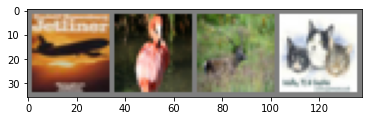

plane  bird  deer   cat


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [15]:
net = Net()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.235
[1,  4000] loss: 1.899
[1,  6000] loss: 1.684
[1,  8000] loss: 1.569
[1, 10000] loss: 1.463
[1, 12000] loss: 1.433
[2,  2000] loss: 1.347
[2,  4000] loss: 1.328
[2,  6000] loss: 1.313
[2,  8000] loss: 1.273
[2, 10000] loss: 1.268
[2, 12000] loss: 1.239
[3,  2000] loss: 1.175
[3,  4000] loss: 1.147
[3,  6000] loss: 1.172
[3,  8000] loss: 1.152
[3, 10000] loss: 1.142
[3, 12000] loss: 1.124
Finished Training


In [18]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

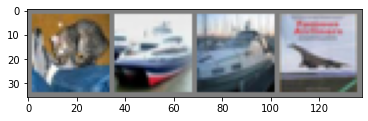

GroundTruth:    cat  ship  ship plane


In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [21]:
outputs = net(images)

In [22]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [23]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [24]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 62.5 %
Accuracy for class car   is: 62.3 %
Accuracy for class bird  is: 55.0 %
Accuracy for class cat   is: 30.6 %
Accuracy for class deer  is: 51.8 %
Accuracy for class dog   is: 56.5 %
Accuracy for class frog  is: 72.3 %
Accuracy for class horse is: 59.0 %
Accuracy for class ship  is: 79.6 %
Accuracy for class truck is: 74.8 %


Que 1.5]

In [25]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [26]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {}
dataloaders = {}
image_datasets['train'] = trainset
image_datasets['val'] =  testset
dataloaders ['train'] = trainloader
dataloaders ['val'] = testloader
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

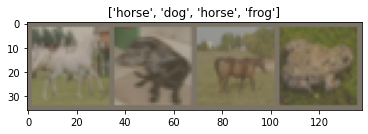

In [27]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [28]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=3):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [29]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [30]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [31]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)

Epoch 0/2
----------
train Loss: 2.5325 Acc: 0.1763
val Loss: 2.3751 Acc: 0.2225

Epoch 1/2
----------
train Loss: 2.2594 Acc: 0.2214
val Loss: 1.9553 Acc: 0.3011

Epoch 2/2
----------
train Loss: 2.0314 Acc: 0.2834
val Loss: 1.7401 Acc: 0.3649

Training complete in 9m 13s
Best val Acc: 0.364900


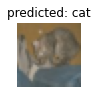

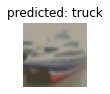

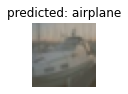

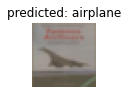

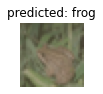

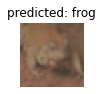

In [32]:
visualize_model(model_ft)

In [49]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = model_ft(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 36 %


In [50]:
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model_ft(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[class_names[label]] += 1
            total_pred[class_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 66.4 %
Accuracy for class automobile is: 27.0 %
Accuracy for class bird  is: 35.6 %
Accuracy for class cat   is: 9.1 %
Accuracy for class deer  is: 24.3 %
Accuracy for class dog   is: 30.7 %
Accuracy for class frog  is: 41.1 %
Accuracy for class horse is: 47.9 %
Accuracy for class ship  is: 19.0 %
Accuracy for class truck is: 63.8 %


In [33]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 10)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [34]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=3)

Epoch 0/2
----------
train Loss: 2.6015 Acc: 0.2608
val Loss: 4.3093 Acc: 0.2599

Epoch 1/2
----------
train Loss: 2.6146 Acc: 0.2631
val Loss: 4.6172 Acc: 0.2366

Epoch 2/2
----------
train Loss: 2.6066 Acc: 0.2663
val Loss: 4.3621 Acc: 0.2953

Training complete in 4m 34s
Best val Acc: 0.295300


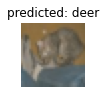

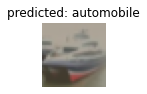

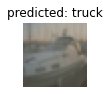

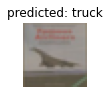

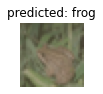

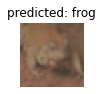

In [35]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [51]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = model_conv(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 29 %


In [52]:
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model_conv(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[class_names[label]] += 1
            total_pred[class_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 40.5 %
Accuracy for class automobile is: 45.1 %
Accuracy for class bird  is: 3.2 %
Accuracy for class cat   is: 2.3 %
Accuracy for class deer  is: 35.9 %
Accuracy for class dog   is: 13.5 %
Accuracy for class frog  is: 44.1 %
Accuracy for class horse is: 34.3 %
Accuracy for class ship  is: 30.9 %
Accuracy for class truck is: 45.5 %
